<a href="https://www.kaggle.com/code/maryamkamelan/flightseda?scriptVersionId=204486422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
#  Importing the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Reading dataset
df = pd.read_csv('/kaggle/input/flights/flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


Dataset Description:
_id:A unique identifier assigned to each flight record in this dataset.

_year:The year in which the flight took place. The dataset includes flights from the year 2013

_month:The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December)

_day:The day of the month on which the flight took place, represented by an integer from 1 to 31

_dep_time:The actual departure time of the flight, represented in 24-hour format (hhmm)

_sched_dep_time:The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm)

_dep_delay:The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure.

_arr_time:The actual arrival time of the flight, represented in 24-hour format (hhmm)

_sched_arr_time:The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm)

_arr_delay:The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. Positive values indicate a delay, while negative values indicate an early arrival

_carrier:A two-letter code representing the airline carrier responsible for the flight

_flight:The designated number of the flight

_tailnum:A unique identifier associated with the aircraft used for the flight

_origin:A three-letter code signifying the airport from which the flight departed

_dest:A three-letter code representing the airport at which the flight arrived

_air_time:The duration of the flight, measured in minutes

_distance:The total distance (in miles) between the origin and destination airports

_hour:The hour component of the scheduled departure time, expressed in local time

_minute:The minute component of the scheduled departure time, expressed in local time

_time_hour:The scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss"

_name:The full name of the airline carrier responsible for the flight

In [11]:
# Display a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

The dataset contains 336,776 entries (rows) and 21 columns.
There are some missing values. Specifically, the columns dep_time, dep_delay, arr_time, arr_delay, tailnum, and air_time have a certain number of non-null entries.

In [12]:
# Convert 'id' and 'flight' to object data type because they are not numerical in terms of their semantics
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [13]:
# Getting the summary statistics for numerical variables
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,695.000000,4983.000000,23.000000,59.000000


Description:
year: All records are from the year 2013, hence there is no variation.

month, day, hour, minute: These features show the scheduled departure date and time. They have a good range and seem to be evenly distributed throughout the year and day.

dep_time, sched_dep_time, arr_time, sched_arr_time: These are the actual and scheduled departure and arrival times of the flights. They are in the 24-hour format and cover all possible values.

dep_delay, arr_delay: These are our target variables. They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival).

air_time: This is the flight duration in minutes. It varies from 20 to 695 minutes.

distance: This is the total distance between the origin and destination airports. It varies from 17 to 4983 miles

In [14]:
def plot_histogram(dataframe, column_name, color_palette='Reds'):
    """
    Plot a histogram for a specified column in the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column for which to plot the histogram.
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[column_name].dropna(), bins=30, kde=True, color=sns.color_palette(color_palette)[4])
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

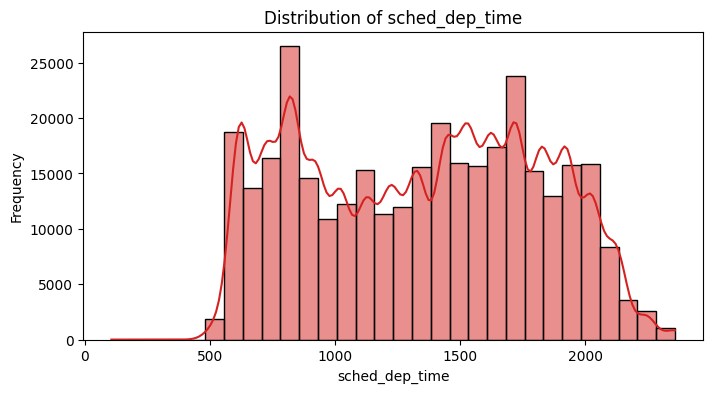

In [15]:
plot_histogram(df, 'sched_dep_time')

The histogram indicats two peak periods for flight departures. The first peak occurs in the morning around 08:00, and the second peak occurs in the evening around 18:00. There are fewer flights at night.

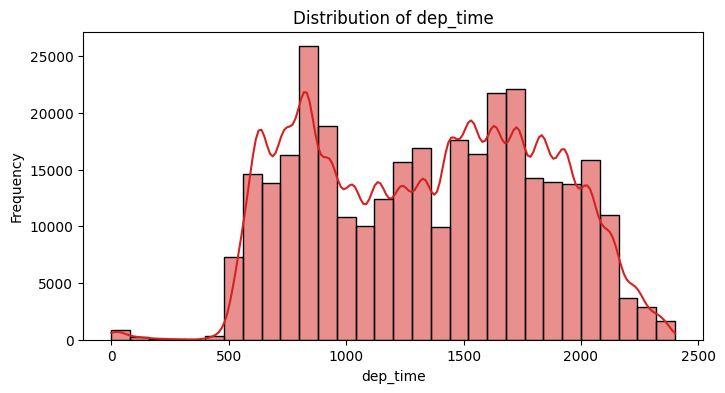

In [16]:
plot_histogram(df, 'dep_time')

As we can see this histogram looks similar to the previous one and this is what we expect in reality.

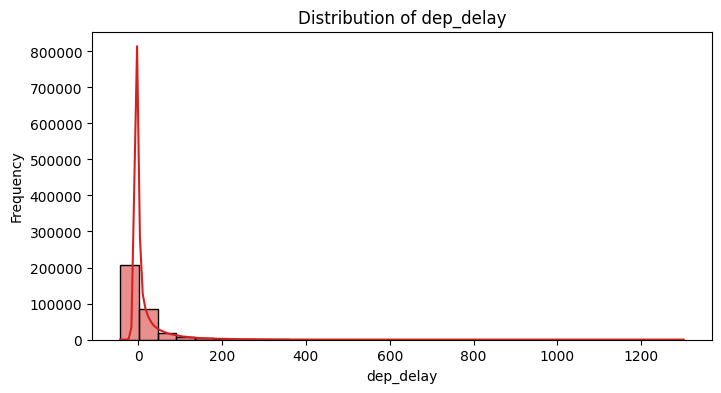

In [17]:
plot_histogram(df, 'dep_delay')

The histogram of departure delay displays that the delay was almost never more than 200 mins and for a considerable amount, the delay is near to 0 or is negative which means the flight flew sooner. 

In [18]:
def plot_bar_plot(dataframe, column_name, color_palette='Set2'):
    """
    Plot a bar plot for a specified column in the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column for which to plot the bar plot.
    - color_palette (str): Seaborn color palette name (default is 'Set2').
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, data=dataframe, palette=color_palette)
    plt.title(f'Bar Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

We can use bar plot to describe some of our categorical datas.

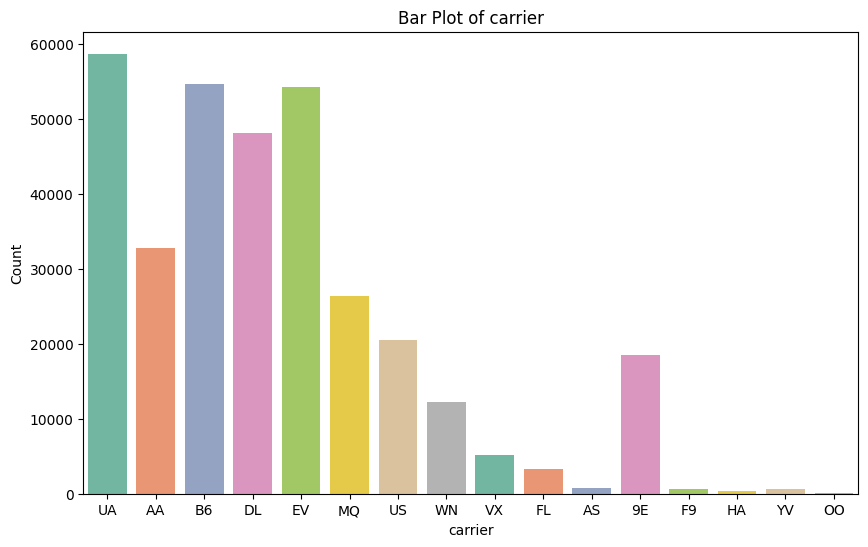

In [19]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar_plot(df, 'carrier')

The graph shows that UA, B6 and EV respectively have the most number of flights in this dataset.

In [20]:
def plot_scatter(dataframe, x_column, y_column):
    """
    Plot a scatter plot for two specified columns in the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - x_column (str): The name of the column for the x-axis.
    - y_column (str): The name of the column for the y-axis.
    - color_palette (str): Seaborn color palette name (default is 'viridis').
    """
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    sns.scatterplot(x=x_column, y=y_column, data=dataframe)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

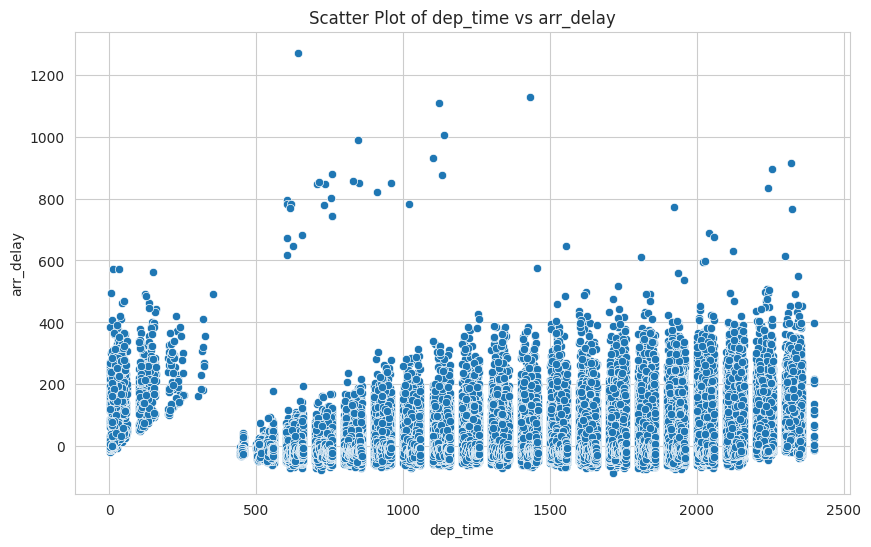

In [21]:
plot_scatter(df, 'dep_time', 'arr_delay')

As we can see the arrival delay arises through the day. It means that early in the morning we have less delay in camparison to night.

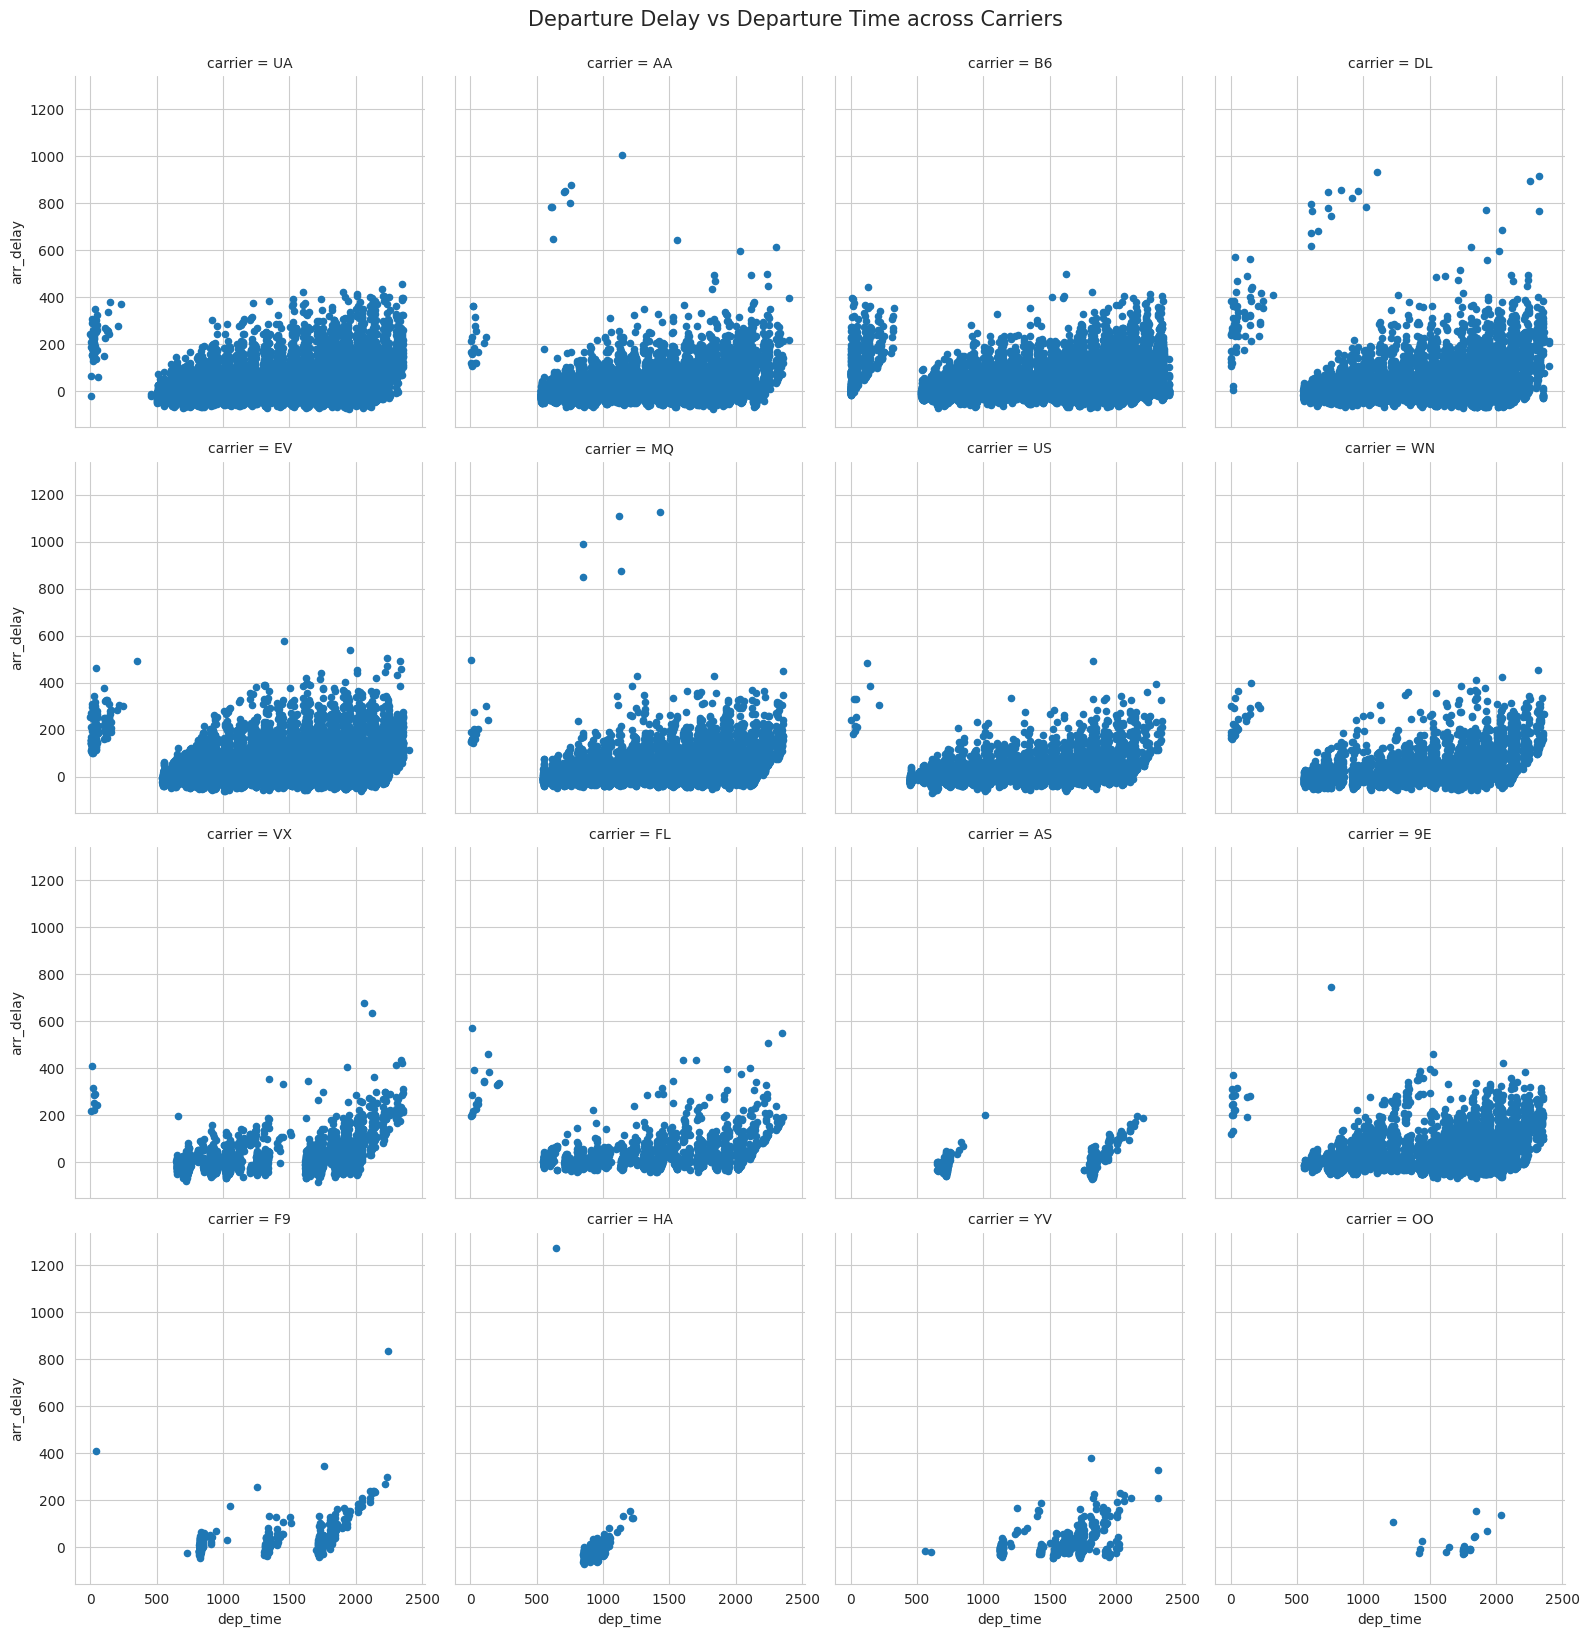

In [22]:
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "arr_delay", s=20)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

These scatter plots show the relationship between arrival delay and departure time for different carriers. This suggests that the interaction between carrier and departure time could be a significant factor influencing arrival delay.

In [23]:
def plot_boxplot(dataframe, x_column, y_column, color_palette='muted', show_outliers=False):
    """
    Plot a box plot for a specified column in the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - x_column (str): The name of the column for the x-axis.
    - y_column (str): The name of the column for the y-axis.
    - color_palette (str): The name of the Seaborn color palette.
    """
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(x=x_column, y=y_column, data=dataframe, palette=color_palette, showfliers=show_outliers)
    plt.title(f'Box Plot of {y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

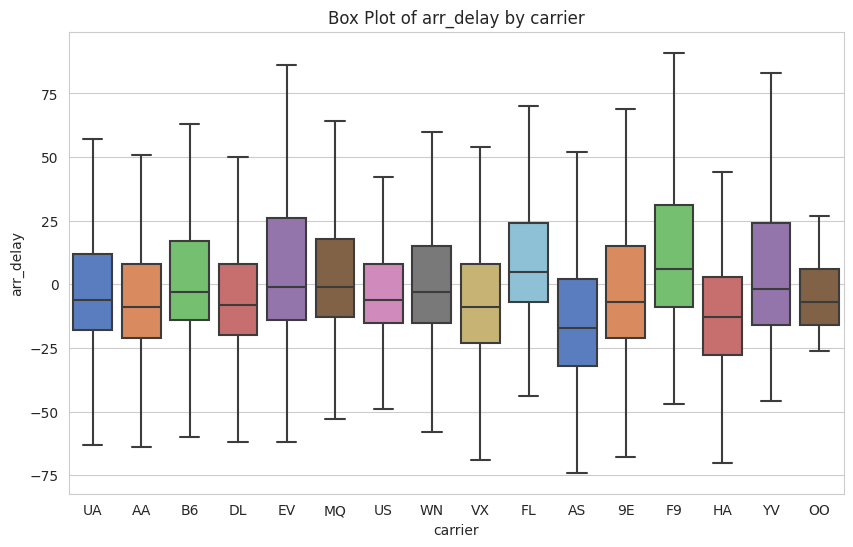

In [24]:
plot_boxplot(df, 'carrier', 'arr_delay')

The box plot of arrival delay based on the carrier shows different distributions. At the first glance FL, EV and F9 are the worst situations. 

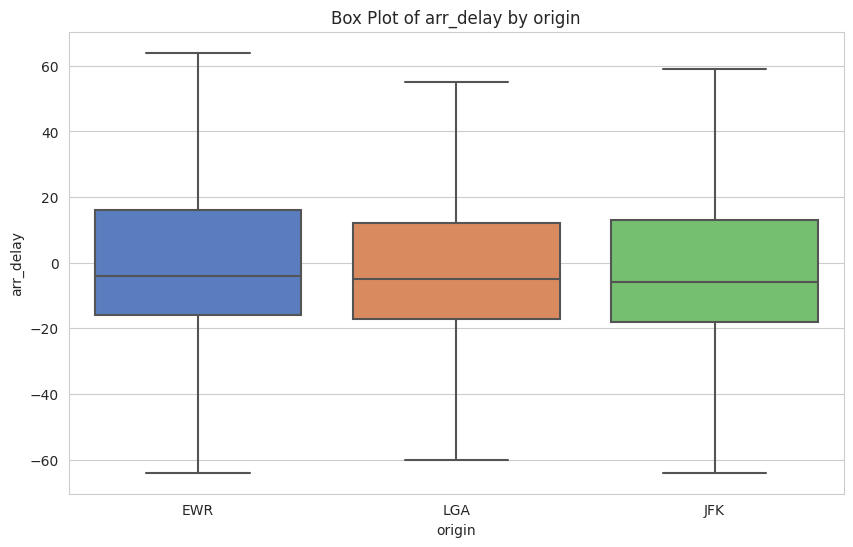

In [25]:
plot_boxplot(df, 'origin', 'arr_delay')

The box plot of arrival delay based on the airport shows different distributions. It seems that EWR is the worst case.

In [26]:
def plot_heatmap(data, numerical_columns=None, cmap='coolwarm'):
    """
    Plot a heatmap for the numerical columns in a DataFrame.

    Parameters:
    - data: DataFrame
    - numerical_columns: list, optional, list of numerical column names to include in the heatmap(omitting year because it has 
    no valuable information)
    - cmap: str, optional (default='coolwarm'), colormap for the heatmap
    """
    if numerical_columns is None:
        numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    numerical_columns = [col for col in numerical_columns if col != 'year']
    numerical_data = data[numerical_columns]
    correlation_matrix = numerical_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap for Numerical Columns')
    plt.show()

In [ ]:
plot_heatmap(df)

The heatmap shows the correlation coefficients between the numeric features.As we can see the matrix is symmetrical about the diameter. dep_delay has a strong positive correlation with arr_delay, which means that as the departure delay increases, the arrival delay also tends to increase.
air_time has a strong correlation with distance too, which means the farther the destination, the longer the flight time.

In [ ]:
df2 = df.dropna()
df2